In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
!pip install catergorical_encoders

ERROR: Could not find a version that satisfies the requirement catergorical_encoders (from versions: none)
ERROR: No matching distribution found for catergorical_encoders


In [2]:
data=pd.read_csv("C:\\Users\\Raju A S\\Downloads\\Fraud.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['step','type', 'amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud' ])
data1=encoder.fit_transform(data)

D:\Users\Raju A S\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


In [15]:
tax_val = []
for value in data["amount"]:
    if value<=30000:
        tax_val.append("Risky")
    else:
        tax_val.append("Good")
        
data1["tax_val"]= tax_val
data1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,tax_val
0,1,1,1,1,1,1,1,1,1,1,1,Risky
1,1,1,2,2,2,2,2,1,1,1,1,Risky
2,1,2,3,3,3,3,3,1,1,2,1,Risky
3,1,3,3,4,3,3,4,2,1,2,1,Risky
4,1,1,4,5,4,4,5,1,1,1,1,Risky
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,3,5316898,6353303,1845842,3,1586561,1,3412673,2,1,Good
6362616,743,2,5316899,6353304,1845843,3,2722361,1,1,2,1,Good
6362617,743,3,5316899,6353305,1845843,3,1077995,3614696,3555498,2,1,Good
6362618,743,2,5316900,6353306,1845844,3,2722362,1,1,2,1,Good


In [16]:
x = data1.drop(['tax_val','amount'], axis =1)
y = data1['tax_val']

In [17]:
x

,step,type,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,1,1,1,1,1,1,1,1
1,1,1,2,2,2,2,1,1,1,1
2,1,2,3,3,3,3,1,1,2,1
3,1,3,4,3,3,4,2,1,2,1
4,1,1,5,4,4,5,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
6362615,743,3,6353303,1845842,3,1586561,1,3412673,2,1
6362616,743,2,6353304,1845843,3,2722361,1,1,2,1
6362617,743,3,6353305,1845843,3,1077995,3614696,3555498,2,1
6362618,743,2,6353306,1845844,3,2722362,1,1,2,1


In [18]:
y

0          Risky
1          Risky
2          Risky
3          Risky
4          Risky
           ...  
6362615     Good
6362616     Good
6362617     Good
6362618     Good
6362619     Good
Name: tax_val, Length: 6362620, dtype: object

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [20]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [21]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts()

Good     1264354
Risky     644432
dtype: int64

In [22]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
tax_val,,
Good,1135499,58779
Risky,128855,585653


In [23]:
np.mean(preds==y_test)

0.9016998238671071

In [24]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        Good       0.95      0.90      0.92   1264354
       Risky       0.82      0.91      0.86    644432

    accuracy                           0.90   1908786
   macro avg       0.89      0.90      0.89   1908786
weighted avg       0.91      0.90      0.90   1908786



Text(0.5, 1.0, 'Decision tree using Entropy')

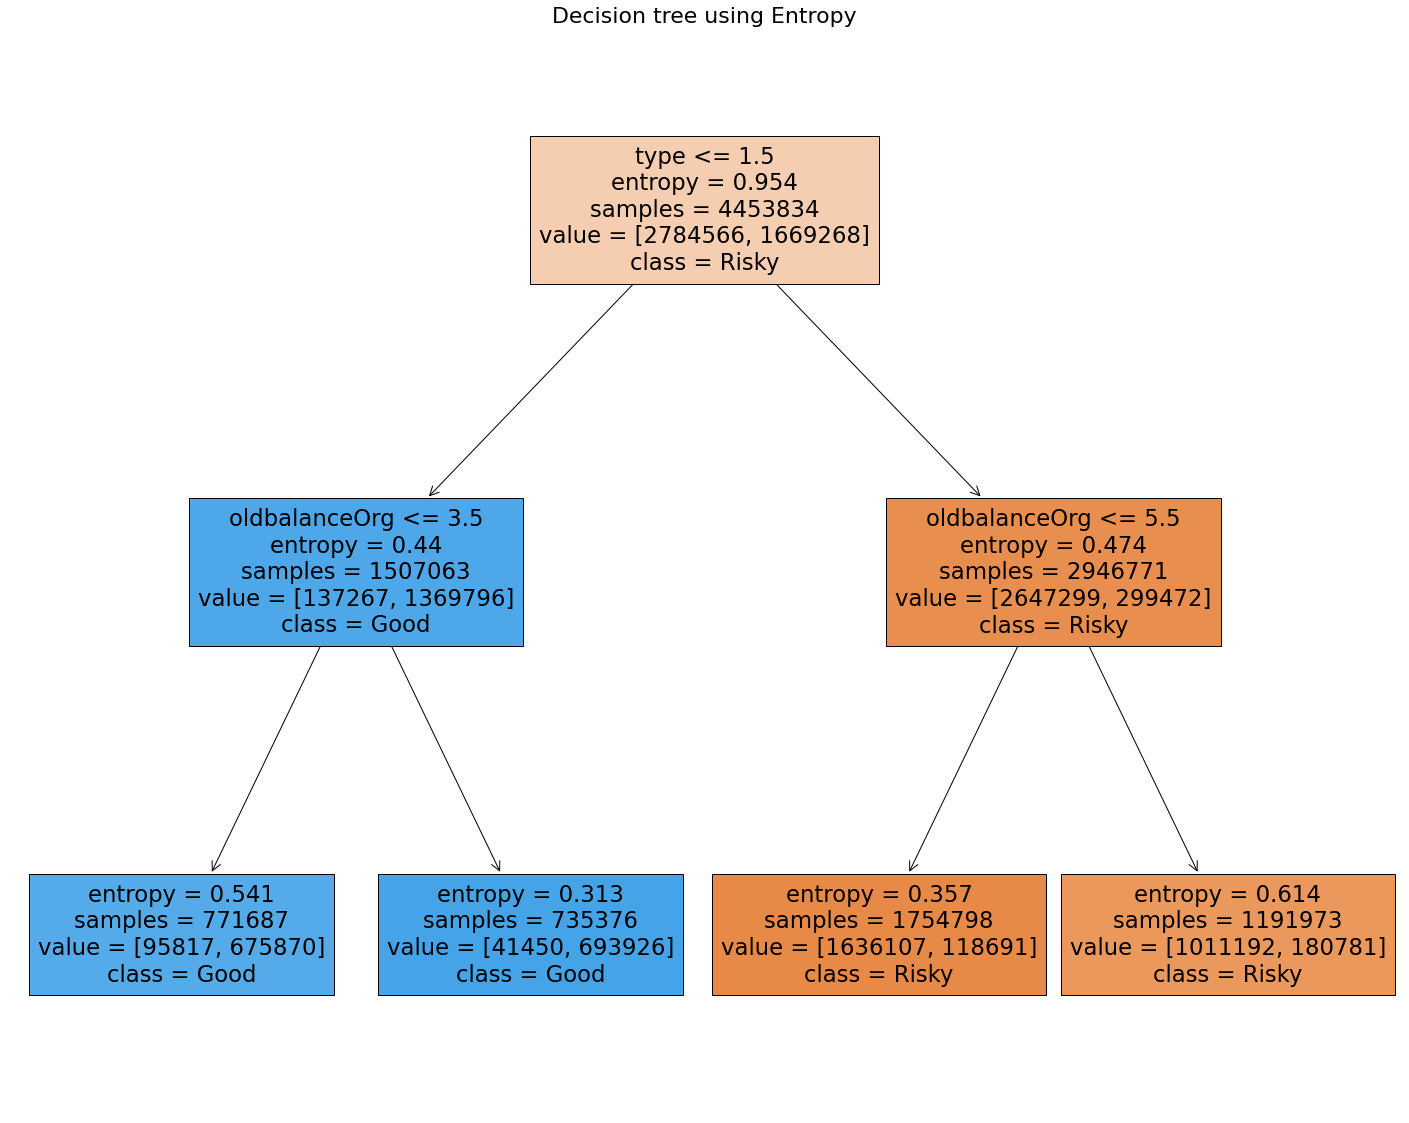

In [25]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['step','type', 'amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud' ], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=2)

In [27]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [28]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9016998238671071

Text(0.5, 1.0, 'Decision tree using Gini')

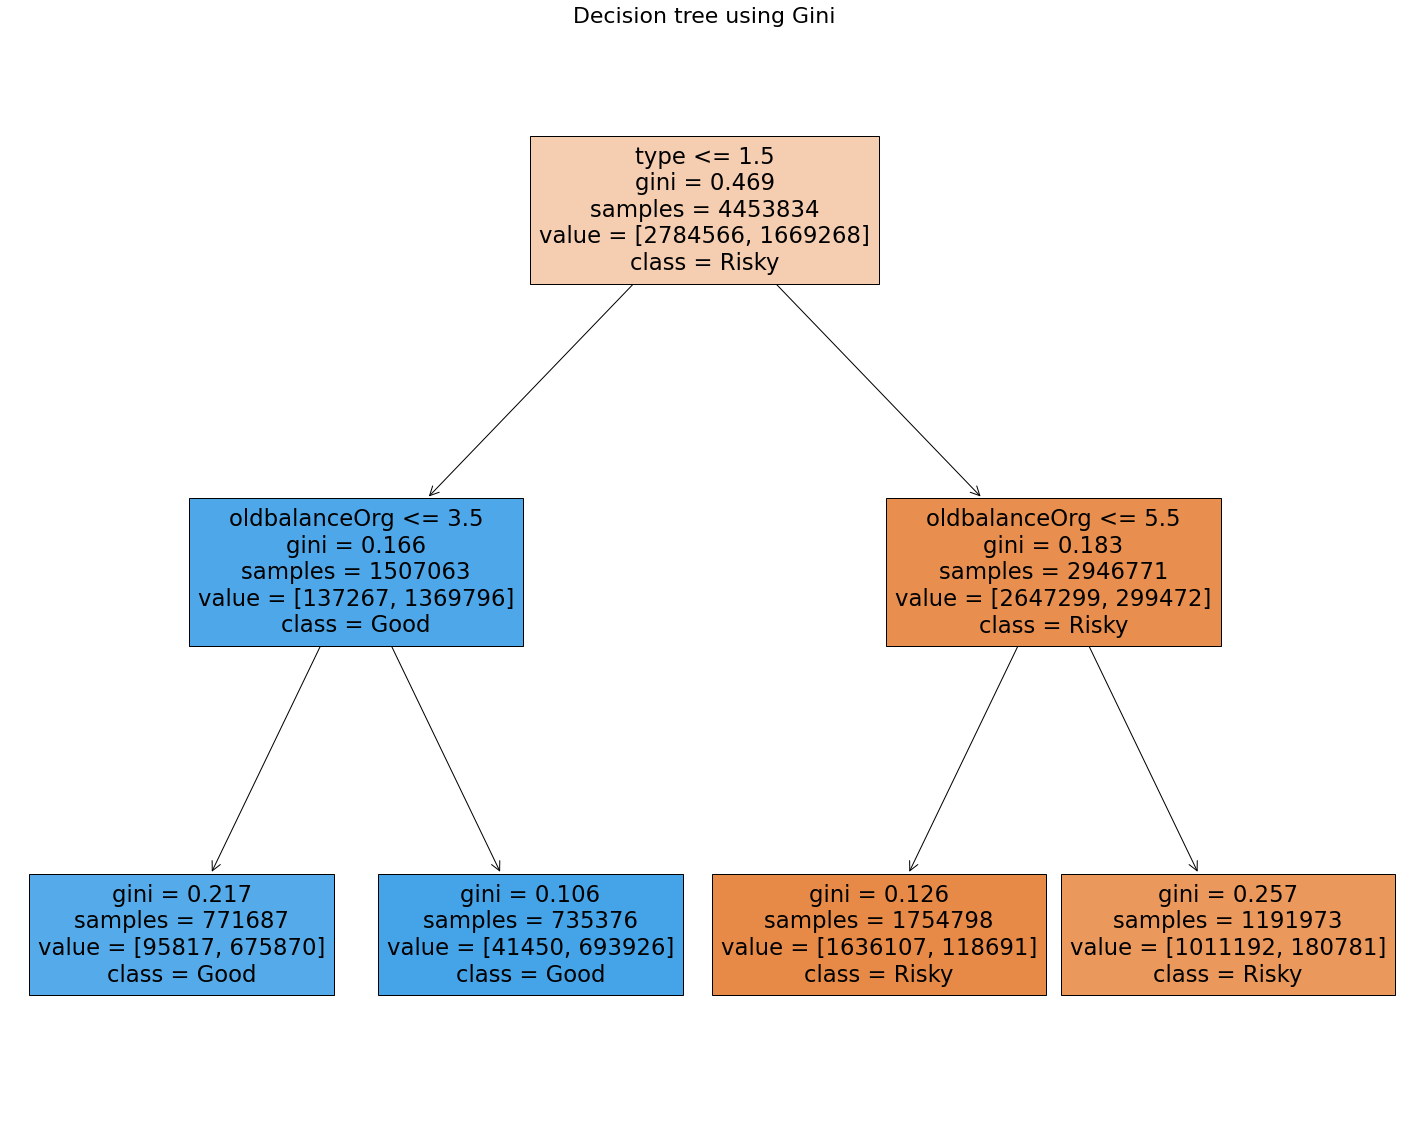

In [29]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['step','type', 'amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)